In [1]:
!pip install prince

# Dimensionality Reduction: MCA & FAMD Assignment

In [2]:
import prince
import pandas as pd

### Import the HR data set 

In [30]:
data_url = 'https://raw.githubusercontent.com/Thinkful-Ed/data-science-lectures/master/hr_dataset.csv'
hr = pd.read_csv(data_url)
print(hr.shape)
hr.head()

(310, 17)


,Age,Pay Rate,State,Zip,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Days Employed,Reason For Term,Employment Status,Department,Position,Manager Name,Employee Source,Performance Score
0,30,28.50,MA,1450,Female,Married,US Citizen,No,Black or African American,3317,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,34,23.00,MA,1460,Male,Divorced,US Citizen,No,Black or African American,1420,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,31,29.00,MA,2703,Male,Single,US Citizen,No,White,1154,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,32,21.50,MA,2170,Female,Married,US Citizen,No,White,58,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,30,16.56,MA,2330,Female,Single,US Citizen,No,White,940,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


### Identify which columns in the data are numeric and which are categorical.

Correct any columns that have been misassigned a numeric data type when they should be categorical.

In [31]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                310 non-null    int64  
 1   Pay Rate           310 non-null    float64
 2   State              310 non-null    object 
 3   Zip                310 non-null    int64  
 4   Sex                310 non-null    object 
 5   MaritalDesc        310 non-null    object 
 6   CitizenDesc        310 non-null    object 
 7   Hispanic/Latino    310 non-null    object 
 8   RaceDesc           310 non-null    object 
 9   Days Employed      310 non-null    int64  
 10  Reason For Term    310 non-null    object 
 11  Employment Status  310 non-null    object 
 12  Department         310 non-null    object 
 13  Position           310 non-null    object 
 14  Manager Name       310 non-null    object 
 15  Employee Source    310 non-null    object 
 16  Performance Score  310 non

In [32]:
numeric = hr.select_dtypes(include='number')
for col in numeric.columns:
  print(f'Columns that are numeric: {col}')

Columns that are numeric: Age
Columns that are numeric: Pay Rate
Columns that are numeric: Zip
Columns that are numeric: Days Employed


In [34]:
hr['Zip'] = hr.Zip.astype(str)
hr.Zip.dtype

dtype('O')

In [35]:
non_num = hr.select_dtypes(exclude='number')
print('Columns that are not numeric:\n', non_num.columns)

Columns that are not numeric:
 Index(['State', 'Zip', 'Sex', 'MaritalDesc', 'CitizenDesc', 'Hispanic/Latino',
       'RaceDesc', 'Reason For Term', 'Employment Status', 'Department',
       'Position', 'Manager Name', 'Employee Source', 'Performance Score'],
      dtype='object')


### Pull out the categorical variables and note the dimensions of the data set.

In [36]:
non_num.shape

(310, 14)

### Reduce these categorical features down to two dimensions using MCA.

In [37]:
#use mca (default n_components=2)
mca = prince.MCA()
mca.fit(non_num)
coordinates_mca = mca.transform(non_num)

In [38]:
coordinates_mca

,0,1
0,0.079355,0.156346
1,0.306006,0.178155
2,0.125535,0.270431
3,0.032135,0.073387
4,0.266306,0.066865
...,...,...
305,-0.008316,1.946860
306,-0.039542,1.603448
307,-0.009376,1.538247
308,-0.031152,1.728578


### Plot the coordinates of each resulting dimension.

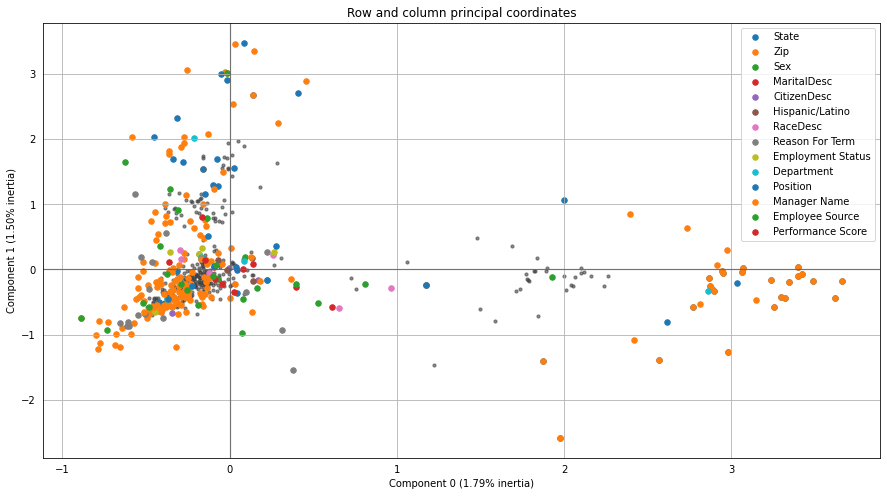

In [39]:
#plotting coordinates
ax = mca.plot_coordinates(
    X=non_num, 
    figsize=(15,8), 
    show_row_points=True, 
    show_row_labels=False, 
    show_column_points=True, 
    show_column_labels=False
    )

### One hot encode the categorical features and note the change in dimensions in the data set.

In [44]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='first')
cat_ = enc.fit_transform(non_num)
cat_.shape

(310, 299)

*After dropping first from all categories the amount of columns went from 14 to 299*

### Reduce the one hot encoded categorical features down to two dimensions using CA.

In [46]:
#use ca to one hot encoded data (default n_components=2)
cat_ = cat_.toarray()
ca = prince.CA()
ca.fit(cat_)
coordinates_ca = ca.transform(cat_)
coordinates_ca 

,0,1
0,-0.005216,0.055604
1,0.358994,0.131880
2,0.022874,0.204797
3,-0.008520,-0.024286
4,0.269930,-0.022815
...,...,...
305,-0.162720,2.046497
306,-0.177769,1.658700
307,-0.137233,1.568613
308,-0.166005,1.765196


### Plot the coordinates of each resulting dimension.

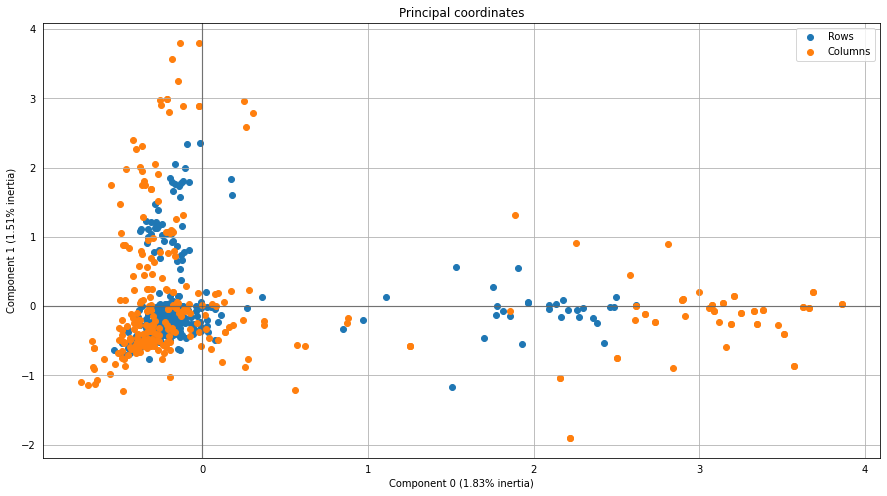

In [48]:
ax = ca.plot_coordinates(
    X=cat_, 
    figsize=(15,8), 
    show_row_labels=False, 
    show_col_labels=False
    )

### Use FAMD to reduce the entire data set (both the categorical and numeric features) down to two dimensions.

In [42]:
#use famd (default n_components=2)
famd = prince.FAMD()
famd.fit(hr)
coordinates_famd = famd.transform(hr)

### Plot the coordinates of each resulting dimension, color-coding the plot points according to Employment Status.

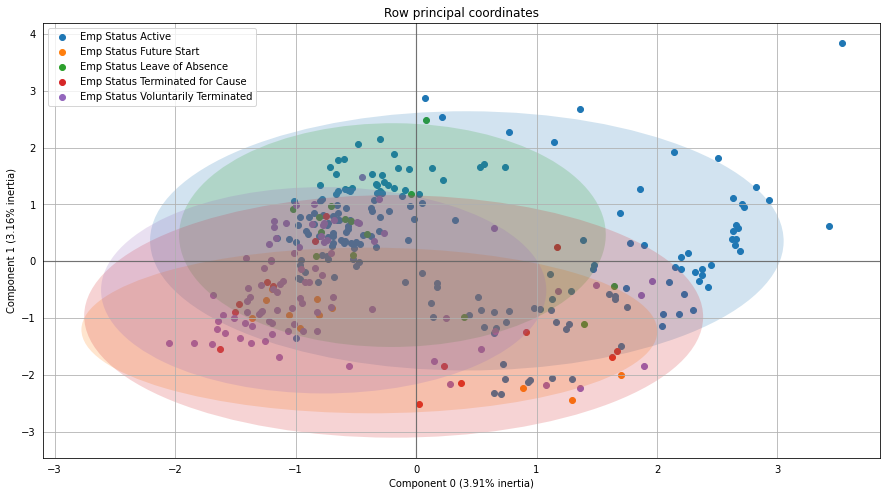

In [43]:
famd.plot_row_coordinates(hr, figsize=(15,8), color_labels=['Emp Status {}'.format(t) for t in hr['Employment Status']])
#ax.legend('Location', 'northeastoutside')
#ax.plt